In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df1=df.reset_index()['high']

In [6]:
df1

0       132.260
1       131.950
2       131.450
3       131.390
4       130.655
         ...   
1253    316.500
1254    318.520
1255    319.520
1256    320.890
1257    319.230
Name: high, Length: 1258, dtype: float64

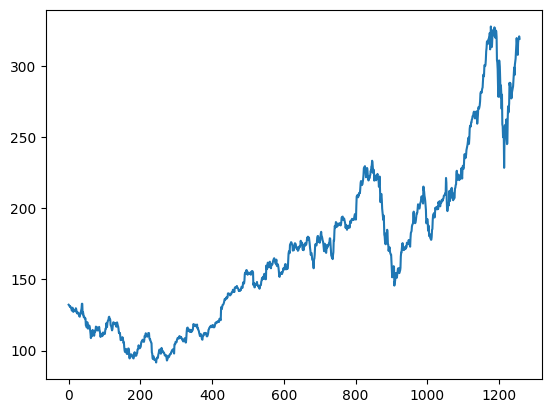

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
df1

0       132.260
1       131.950
2       131.450
3       131.390
4       130.655
         ...   
1253    316.500
1254    318.520
1255    319.520
1256    320.890
1257    319.230
Name: high, Length: 1258, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       ...,
       [0.96473029],
       [0.97053095],
       [0.96350241]])

In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(817, 441)

In [14]:
train_data

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       [0.16817681],
       [0.16506478],
       [0.16627149],
       [0.16474723],
       [0.16097891],
       [0.15894657],
       [0.15416208],
       [0.15949699],
       [0.1630536 ],
       [0.15522059],
       [0.15060547],
       [0.15318825],
       [0.15331527],
       [0.15513591],
       [0.15306122],
       [0.1540774 ],
       [0.15217207],
       [0.16144466],
       [0.15890423],
       [0.15378101],
       [0.14734525],
       [0.14586332],
       [0.14933525],
       [0.14827674],
       [0.14632907],
       [0.14599035],
       [0.13959692],
       [0.13714116],
       [0.13625201],
       [0.14431789],
       [0.14692184],
       [0.15022441],
       [0.15623677],
       [0.16068253],
       [0.17486663],
       [0.17465492],
       [0.14323821],
       [0.14997036],
       [0.14425438],
       [0.13523584],
       [0.13650605],
       [0.13477009],
       [0.13083199],
       [0.13113939],
       [0.130

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 215ms/step - loss: 0.0194 - val_loss: 0.0692
Epoch 2/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 3/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0012 - val_loss: 0.0079
Epoch 4/100
12/12 [==============================] - 1s 117ms/step - loss: 8.7285e-04 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 1s 116ms/step - loss: 6.4885e-04 - val_loss: 0.0044
Epoch 6/100
12/12 [==============================] - 1s 118ms/step - loss: 6.4640e-04 - val_loss: 0.0039
Epoch 7/100
12/12 [==============================] - 1s 118ms/step - loss: 6.1007e-04 - val_loss: 0.0044
Epoch 8/100
12/12 [==============================] - 1s 120ms/step - loss: 6.0863e-04 - val_loss: 0.0036
Epoch 9/100
12/12 [==============================] - 1s 118ms/step - loss: 5.8803e-04 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 1s 117ms/step

12/12 [==============================] - 1s 122ms/step - loss: 1.8416e-04 - val_loss: 9.2078e-04
Epoch 79/100
12/12 [==============================] - 2s 134ms/step - loss: 1.9264e-04 - val_loss: 0.0012
Epoch 80/100
12/12 [==============================] - 1s 124ms/step - loss: 1.8093e-04 - val_loss: 8.9770e-04
Epoch 81/100
12/12 [==============================] - 2s 128ms/step - loss: 1.7987e-04 - val_loss: 0.0011
Epoch 82/100
12/12 [==============================] - 2s 144ms/step - loss: 1.8272e-04 - val_loss: 0.0012
Epoch 83/100
12/12 [==============================] - 2s 128ms/step - loss: 1.9450e-04 - val_loss: 8.8375e-04
Epoch 84/100
12/12 [==============================] - 2s 129ms/step - loss: 2.3382e-04 - val_loss: 0.0014
Epoch 85/100
12/12 [==============================] - 2s 129ms/step - loss: 1.9247e-04 - val_loss: 9.0437e-04
Epoch 86/100
12/12 [==============================] - 2s 135ms/step - loss: 1.9532e-04 - val_loss: 9.0755e-04
Epoch 87/100
12/12 [===================

In [27]:
#prediction and checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 22ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.64575596318937

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

238.3066998748922

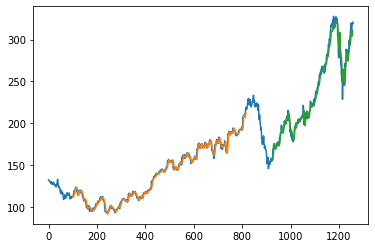

In [32]:
## Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

441

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.855322211872301,
 0.8846218985519521,
 0.8845372173765771,
 0.8819121009399611,
 0.8858921161825726,
 0.9008802608180202,
 0.9262426962486241,
 0.935726987890592,
 0.954356846473029,
 0.956473875857397,
 0.947709374206114,
 0.948556185959861,
 0.9614277246168177,
 0.9626132610720637,
 0.9667202980777374,
 0.9648996528071809,
 0.9808620543653146,
 0.9319163349987298,
 0.9599881446354475,
 1.0000000000000002,
 0.9840799390295536,
 0.9781099161656364,
 0.9391989160809553,
 0.9652383775086799,
 0.9869167584046066,
 0.9888644254382253,
 0.9811584384791261,
 0.9733254297569651,
 0.9832754678634938,
 0.9973325429756967,
 0.993098484206961,
 0.9920823101024643,
 0.9657041239732409,
 0.9861122872385468,
 0.9864510119400456,
 0.9686679651113557,
 0.8997798289440258,
 0.8927936319756118,
 0.8731052587009909,
 0.8228046405284106,
 0.7906681344737065,
 0.88817850791769,
 0.8990176983656533,
 0.8964772631044118,
 0.8801761368447796,
 0.8432128037937168,
 0.789313235667711,
 0.8246676263866544,
 0

In [37]:
#prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94820285]
101
1 day input [0.8846219  0.88453722 0.8819121  0.88589212 0.90088026 0.9262427
 0.93572699 0.95435685 0.95647388 0.94770937 0.94855619 0.96142772
 0.96261326 0.9667203  0.96489965 0.98086205 0.93191633 0.95998814
 1.         0.98407994 0.97810992 0.93919892 0.96523838 0.98691676
 0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.89579981 0.

12 day output [[0.8966242]]
13 day input [0.96261326 0.9667203  0.96489965 0.98086205 0.93191633 0.95998814
 1.         0.98407994 0.97810992 0.93919892 0.96523838 0.98691676
 0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.89579981 0.90397155 0.92590397 0.95427217
 0.96544161 0.9496147  0.9235329  0.91553053 0.95194343 0.96049623
 0.96473029 0.97053095 

24 day output [[0.87985766]]
25 day input [0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.89579981 0.90397155 0.92590397 0.95427217
 0.96544161 0.9496147  0.9235329  0.91553053 0.95194343 0.96049623
 0.96473029 0.97053095 0.96350241 0.94820285 0.9425146  0.93128723
 0.9197731  0.91051388 0.90409064 0.90018964 0.8982082  0.89749014
 0.89741695 0.89746863

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

1258

In [50]:
scaler.inverse_transform(lst_output)

array([[315.61654874],
       [314.27309784],
       [311.62141776],
       [308.90201118],
       [306.71516768],
       [305.19812805],
       [304.27678874],
       [303.8088129 ],
       [303.63922216],
       [303.62193508],
       [303.63414021],
       [303.58785363],
       [303.43470533],
       [303.16374305],
       [302.7923665 ],
       [302.35489644],
       [301.89112975],
       [301.4374425 ],
       [301.02099004],
       [300.65713083],
       [300.34924347],
       [300.09113388],
       [299.86983676],
       [299.66957131],
       [299.47478198],
       [299.27291171],
       [299.05554219],
       [298.81892883],
       [298.56360657],
       [298.29291177]])

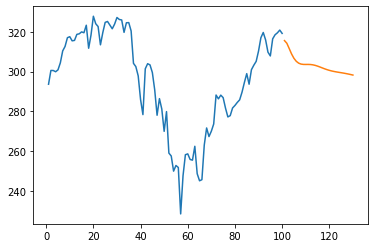

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

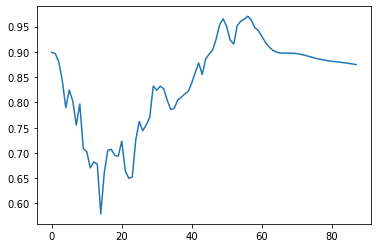

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [46]:
df3=scaler.inverse_transform(df3).tolist()

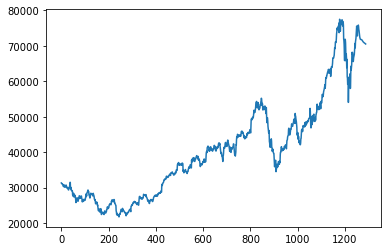

In [47]:
plt.plot(df3)